In [ ]:
#Download Dataset

from google_drive_downloader import GoogleDriveDownloader as gdd
drive_id = '1txyKhs1Zt5AKswGGK9VI_jE0JNHuQT85'
d_path ='/content/Data_A.zip'

gdd.download_file_from_google_drive(file_id=drive_id , dest_path=d_path, unzip = True)

drive_id = '1TLiVh2jKUUQZyhudPoEQmTRscQnLxo9g'
d_path ='/content/Data_2.zip'

gdd.download_file_from_google_drive(file_id=drive_id , dest_path=d_path, unzip = True)


Unzipping...Done.
Unzipping...Done.


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

Task - Dataset A experiment

In [ ]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 180*180 # num_features = 180*180
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import pandas as pd

df = pd.read_csv('/content/training-a.csv')
df = df[['filename','digit']]
df.head()

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
import os
path = '/content/training-a/'
for index,row in df.iterrows():
  new_path=path+str(row['digit'])
  if(os.path.isdir(new_path)):
    os.rename(path+row['filename'],new_path+'/'+row['filename'])
  else:
    os.makedirs(new_path )
    os.rename(path+row['filename'],new_path+'/'+row['filename'])

In [ ]:
'''
LOADING DATASET
'''
transform = transforms.Compose([
                                transforms.Grayscale(),                                 
                                transforms.ToTensor() 
                                ])
 
full_dataset = dsets.ImageFolder(root='/content/training-a',transform= transform )

torch.manual_seed(0)
train_size = int(0.85 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
print(len(train_dataset))
print(len(test_dataset))

16746
2956


In [ ]:
# One Image Size
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)
# First Image Label
print(train_dataset[0][1])

torch.Size([1, 180, 180])
(1, 180, 180)
4


In [ ]:
#model 1
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_5 = nn.ReLU()

         ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
        
        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS



In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
loss_list1 = []
accuracy_list1 = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            loss_list1.append(loss.item())
            accuracy_list1.append(accuracy)


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3066370487213135. Accuracy: 9.269282814614344
Iteration: 1000. Loss: 2.297433376312256. Accuracy: 9.945872801082544
Iteration: 1500. Loss: 2.3035435676574707. Accuracy: 9.709066305818673
Iteration: 2000. Loss: 2.302886486053467. Accuracy: 9.573748308525033
Iteration: 2500. Loss: 2.3014845848083496. Accuracy: 12.110960757780784
Iteration: 3000. Loss: 2.302197217941284. Accuracy: 9.269282814614344
Iteration: 3500. Loss: 2.2996649742126465. Accuracy: 9.269282814614344
Iteration: 4000. Loss: 2.3069286346435547. Accuracy: 9.709066305818673
Iteration: 4500. Loss: 2.3034279346466064. Accuracy: 9.573748308525033
Iteration: 5000. Loss: 2.2986836433410645. Accuracy: 9.709066305818673
Iteration: 5500. Loss: 2.296119213104248. Accuracy: 9.709066305818673
Iteration: 6000. Loss: 2.2962493896484375. Accuracy: 9.573748308525033
Iteration: 6500. Loss: 2.2944817543029785. Accuracy: 9.776725304465494
Iteration: 7000. Loss: 2.301377773284912. Accuracy: 17.591339648173207
Iteration:

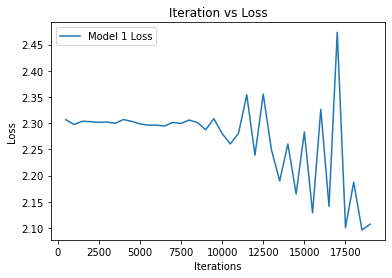

In [ ]:
import matplotlib.pyplot as plt
i = [(loss_list1.index(i)+1)*500 for i in loss_list1]

plt.plot(i,loss_list1,label = "Model 1 Loss")
plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Hyperparameters 

batch_size = 50
num_iters = 100000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
LOADING DATASET
'''
transform = transforms.Compose([
                                transforms.Grayscale(),                                 
                                transforms.Resize((28,28)),
                                 transforms.ToTensor(),             
                              ])
 
full_dataset = dsets.ImageFolder(root='/content/training-a',transform= transform )

torch.manual_seed(0)
train_size = int(0.85 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
#model 2
class DeepNeuralNetworkModel2(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, 720)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(720, 360)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(360, 180)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(180, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

       
         # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS



In [ ]:
model = DeepNeuralNetworkModel2(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter = 0
#loadedModel = torch.load('/content/drive/MyDrive/Soft_Computing/Assignment2/exp1_model2-iteration-100188.pt')
#iter = loadedModel['iter']
#epoch=  loadedModel['epoch']
#model.load_state_dict(loadedModel['model_state'])
#model.eval()

loss_list1_2 = []
accuracy_list1_2 = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            
            accuracy = 100 * correct.item() / total
            loss_list1_2.append(loss.item())
            accuracy_list1_2.append(accuracy)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.307987928390503. Accuracy: 9.641407307171853
Iteration: 1000. Loss: 2.3036327362060547. Accuracy: 10.757780784844384
Iteration: 1500. Loss: 2.3034090995788574. Accuracy: 15.798376184032476
Iteration: 2000. Loss: 2.2977986335754395. Accuracy: 9.878213802435724
Iteration: 2500. Loss: 2.300408124923706. Accuracy: 12.787550744248986
Iteration: 3000. Loss: 2.2965707778930664. Accuracy: 9.945872801082544
Iteration: 3500. Loss: 2.3006067276000977. Accuracy: 17.523680649526387
Iteration: 4000. Loss: 2.294069766998291. Accuracy: 10.182679296346414
Iteration: 4500. Loss: 2.2940311431884766. Accuracy: 10.385656292286875
Iteration: 5000. Loss: 2.2987060546875. Accuracy: 15.358592692828147
Iteration: 5500. Loss: 2.2805135250091553. Accuracy: 10.588633288227335
Iteration: 6000. Loss: 2.2570412158966064. Accuracy: 18.26792963464141
Iteration: 6500. Loss: 2.2602431774139404. Accuracy: 18.843031123139376
Iteration: 7000. Loss: 2.1928510665893555. Accuracy: 10.317997293640055
Ite

KeyboardInterrupt: ignored

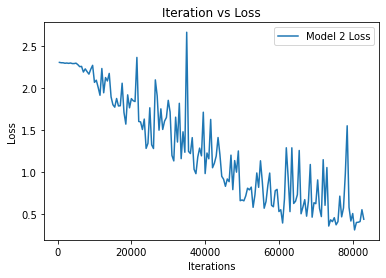

In [ ]:
import matplotlib.pyplot as plt
itr = [(loss_list1_2.index(i)+1)*500 for i in loss_list1_2]

plt.plot(itr,loss_list1_2)
plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend('Loss Curve',loc='best')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [ ]:
dest ='/content/drive/MyDrive/SoftComputing Assignment 2/'

In [ ]:
with open(dest+"model1_exp1.txt", "w") as output:
    output.write(str(loss_list1))
    output.write('\n')
    output.write(str(accuracy_list1))

In [ ]:
path=dest
path += f"exp1_model2-iteration-{iter}.pt"
save_obj = {

       'epoch': epoch,
       'iter': iter,
       'model_state': model.state_dict(),
       'optimizer_state': optimizer.state_dict(),       
       }
torch.save(model.state_dict(), path)




In [ ]:
with open(dest+"model2_exp1.txt", "w") as output:
    output.write(str(loss_list1_2))
    output.write('\n')
    output.write(str(accuracy_list1_2))

Given dataset 2 Experiment 

In [ ]:
!pip install idx2numpy

In [ ]:
#train dataset 2
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from PIL import Image
    
imagefile = '/content/Dataset_2/train-images-idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
print(imagearray[0].shape)
labels_path = '/content/Dataset_2/train-labels-idx1-ubyte'
labels = idx2numpy.convert_from_file(labels_path)
labels[0]

train_d2='/content/Dataset_2/train'
if(not os.path.isdir(train_d2)):
  os.makedirs(train_d2)


for i in range(len(labels)):
  pixels = np.array(imagearray[i], dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
 # pixels = pixels.reshape((28, 28))
  if(not os.path.isdir(train_d2+'/'+str(labels[i]))):
      os.makedirs(train_d2+'/'+str(labels[i]))

  n = len(os.listdir(train_d2+'/'+str(labels[i])))+1
  
  im = Image.fromarray(pixels)
  im.save(train_d2+'/'+str(labels[i])+'/'+str(n)+'.png')

  
  

#plt.imshow(imagearray[4], cmap=plt.cm.binary)

In [ ]:
#test dataset 2
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from PIL import Image
    
imagefile = '/content/Dataset_2/t10k-images-idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
print(imagearray[0].shape)
labels_path = '/content/Dataset_2/t10k-labels-idx1-ubyte'
labels = idx2numpy.convert_from_file(labels_path)
labels[0]

ds2='/content/Dataset_2/test'
if(not os.path.isdir(ds2)):
  os.makedirs(ds2)


for i in range(len(labels)):
  pixels = np.array(imagearray[i], dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
 # pixels = pixels.reshape((28, 28))
  if(not os.path.isdir(ds2+'/'+str(labels[i]))):
      os.makedirs(ds2+'/'+str(labels[i]))

  n = len(os.listdir(ds2+'/'+str(labels[i])))+1
  
  im = Image.fromarray(pixels)
  im.save(ds2+'/'+str(labels[i])+'/'+str(n)+'.png')

  
  

#plt.imshow(imagearray[4], cmap=plt.cm.binary)

In [ ]:
# Hyperparameters for exp 1

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
LOADING DATASET
'''
transform = transforms.Compose([
                                transforms.Grayscale(),                                 
                                transforms.ToTensor() 
                                ])
 
train_dataset = dsets.ImageFolder(root='/content/Dataset_2/train',transform= transform )
test_dataset = dsets.ImageFolder(root='/content/Dataset_2/test',transform= transform )


'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
print(len(train_dataset))
print(len(test_dataset))
# One Image Size
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)
# First Image Label
print(train_dataset[0][1])


In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
loss_list2 = []
accuracy_list2 = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
       

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)
                

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            loss_list2.append(loss.item())
            accuracy_list2.append(accuracy)


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [ ]:
import matplotlib.pyplot as plt
itr = [(loss_list2.index(i)+1)*500 for i in loss_list2]

plt.plot(itr,loss_list2)
plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend('Loss Curve',loc='best')
plt.show()

In [ ]:
# Hyperparameters for exp 2

batch_size = 100
num_iters = 50000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
model = DeepNeuralNetworkModel2(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
loss_list2_2 = []
accuracy_list2_2 = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            loss_list2_2.append(loss.item())
            accuracy_list2_2.append(accuracy)


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [ ]:
import matplotlib.pyplot as plt
itr = [(loss_list2_2.index(i)+1)*500 for i in loss_list2_2]

plt.plot(itr,loss_list2_2)
plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend('Loss Curve',loc='best')
plt.show()

# **Visualization of Comparison**

In [ ]:
m1_exp1_path='/content/drive/MyDrive/SoftComputing Assignment 2/model1_exp1.txt'
m2_exp1_path='/content/drive/MyDrive/SoftComputing Assignment 2/model2_exp1.txt'

m1_exp2_path='/content/drive/MyDrive/SoftComputing Assignment 2/model1_exp2.txt'
m2_exp2_path='/content/drive/MyDrive/SoftComputing Assignment 2/model2_exp2.txt'



In [ ]:
with open(m1_exp1_path) as f:
    lines = f.read().splitlines()
    m1_e1_loss =[float(x) for x in lines[0][1:-1].split(", ")]
    m1_e1_acc = [float(x) for x in lines[1][1:-1].split(", ")]
    print(m1_e1_acc)


In [ ]:
with open(m2_exp1_path) as f:
    lines = f.read().splitlines()
    m2_e1_loss =[float(x) for x in lines[0][1:-1].split(", ")]
    m2_e1_acc = [float(x) for x in lines[1][1:-1].split(", ")]
    print(m2_e1_acc)


In [ ]:
with open(m1_exp2_path) as f:
    lines = f.read().splitlines()
    m1_e2_loss =[float(x) for x in lines[0][1:-1].split(", ")]
    m1_e2_acc = [float(x) for x in lines[1][1:-1].split(", ")]
    print(m1_e2_acc)


    

In [ ]:
with open(m2_exp2_path) as f:
    lines = f.read().splitlines()
    m2_e2_loss =[float(x) for x in lines[0][1:-1].split(", ")]
    m2_e2_acc = [float(x) for x in lines[1][1:-1].split(", ")]
    print(m2_e2_acc)


    

In [ ]:
import matplotlib.pyplot as plt
itr = [(m1_e1_loss.index(i)+1)*500 for i in m1_e1_loss]

plt.plot(itr,m1_e1_loss,label = "Dataset 1")

itr = [(m1_e2_loss.index(i)+1)*500 for i in m1_e2_loss]

plt.plot(itr,m1_e2_loss,label = "Dataset 2")

plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss comparison between two datasets(Model 1) ')
# show a legend on the plot
plt.legend()

plt.show()



In [ ]:
import matplotlib.pyplot as plt
itr = [(m1_e1_acc.index(i)+1)*500 for i in m1_e1_acc]

plt.plot(itr,m1_e1_acc,label = "Dataset 1")

itr = [(m1_e2_acc.index(i)+1)*500 for i in m1_e2_acc]

plt.plot(itr,m1_e2_acc,label = "Dataset 2")

plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Accuracy comparison between two datasets(Model 1) ')
# show a legend on the plot
plt.legend()

plt.show()



In [ ]:
import matplotlib.pyplot as plt
itr = [(m2_e1_loss.index(i)+1)*500 for i in m2_e1_loss]

plt.plot(itr,m2_e1_loss,label = "Dataset 1")

itr = [(m2_e2_loss.index(i)+1)*500 for i in m2_e2_loss]

plt.plot(itr,m2_e2_loss,label = "Dataset 2")

plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss comparison between two datasets(Model 2) ')
# show a legend on the plot
plt.legend()

plt.show()



In [ ]:
import matplotlib.pyplot as plt
itr = [(m2_e1_acc.index(i)+1)*500 for i in m2_e1_acc]

plt.plot(itr,m2_e1_acc,label = "Dataset 1")

itr = [(m2_e2_acc.index(i)+1)*500 for i in m2_e2_acc]

plt.plot(itr,m2_e2_acc,label = "Dataset 2")

plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Accuracy comparison between two datasets(Model 2) ')
# show a legend on the plot
plt.legend()

plt.show()

